# ResNet Model

In [42]:
import numpy as np
from keras.models import Model

import keras.backend as K

from Model_ResNet_helper import *
from preprocessing import load_images as l_i
from preprocessing import load_file as l_f

from PIL import Image
from os import listdir
import random

In [43]:
data_file_name = "sampled_data.csv"
path_training = "train/images/" # path from current folder to training images
#path_testing = "data/test/" # path from current folder to testing images
path_testing = "train/images/" # path from current folder to testing images

In [44]:
### Set training and testing details #################################################
m = l_f.check_num_images(data_file_name)
m_training = 5
m_testing = 5
num_epochs = 2 
num_batches = 32

In [45]:
### Train Data #######################################################################
np.random.seed(1)
### Shuffle the m examples
list_of_rows = np.arange(1, m+1, 1)
np.random.shuffle(list_of_rows)
### Take a random m_training examples and load the data
img_dict = l_f.load_file(data_file_name, list_of_rows[:m_training])
### Load and process the images
(train_x, train_y) = l_i.load_images(path_training, img_dict)

### Normalize image vectors
train_x = train_x / 255

### Convert to one hot vector
print(train_x.shape)
print(train_y.shape)

(5, 64, 64, 3)
(5,)


In [46]:
### Test Data #######################################################################
### Take a random m_testing examples and load the data
#img_dict = l_f.load_file(data_file_name, list_of_rows[m_training:m_testing])
img_dict_test = l_f.load_file(data_file_name, list_of_rows[m_training:m_training + m_testing])
### Load and process the images
(test_x, test_y) = l_i.load_images(path_testing, img_dict_test)
#print(test_y)

### Normalize image vectors
test_x = test_x / 255

### Convert to one hot vector
print(test_x.shape)
print(test_y.shape)

(5, 64, 64, 3)
(5,)


In [47]:
model = ResNet50(input_shape = (64, 64, 3)) #changed classes from 4 to 2
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs = num_epochs, batch_size = num_batches)

Epoch 1/2
5/5 [==============================] - 24s 5s/step - loss: 1.7440 - accuracy: 0.4000
Epoch 2/2
5/5 [==============================] - 1s 130ms/step - loss: 0.0175 - accuracy: 1.0000


In [48]:
evaluation = model.evaluate(test_x, test_y)
print(evaluation)
print ("Loss = " + str(evaluation[0]))
print ("Test Accuracy = " + str(evaluation[1]))

5/5 [==============================] - 3s 633ms/step
[0.930036187171936, 0.6000000238418579]
Loss = 0.930036187171936
Test Accuracy = 0.6000000238418579


In [49]:
import csv

error_analysis_num = 1 # update so it doesn't overwrite previous csv files
list_of_row_nums = list_of_rows[m_training:m_training + m_testing]
preds = model.predict(test_x)

with open("error_analysis" + str(error_analysis_num) + ".csv", "w", newline = "") as csv_write_file: 
    line = csv.writer(csv_write_file)
    headers = ["img_name", "uid", "subtype", "prediction"]
    line.writerow(headers)
    with open(data_file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        sample_count = 0
        for row in csv_reader:
            if (row[0] == ""):
                break
            if line_count in list_of_row_nums:
                img_name = row[17]
                uid = row[20]
                subtype = row[19]
                prediction = str(int(round(preds[sample_count][0])))
                sample_count += 1
                if (prediction != subtype):
                    # Save information to csv file
                    new_entry = [img_name, uid, subtype, prediction]
                    line.writerow(new_entry)
            line_count += 1

# Basic Model

In [94]:
from pre_processing import load_file as l_f

np.random.seed(1)
data_file_name = "CS230/full_data_train_post.csv"
path_training = "CS230/data/train/" # path from current folder to training images
path_testing = "CS230/data/test/" # path from current folder to testing images

In [104]:
from PIL import Image
from pre_processing import crop_image as c_i
import numpy as np
from os import listdir

# Load and process the images for the mini-batch
def load_images(path, img_dict):
    ### Starts a list of images
    images_x = []
    images_y = []
    ### Loops through image dictionary, opens the image file and processes it
    for fname in img_dict:
        img = Image.open(path + fname)
        ### For each image, go through the specific buildings asked for
        for uid in img_dict[fname]:
            ### Collect the polygon
            xy = img_dict[fname][uid][1]
            ### Crop the image, reshape, and append
            img_crop = c_i.crop_image(img, xy)
            img_rgb = img_crop.convert('RGB')
            
            img_pixels = np.array(img_rgb)
            
            images_x.append(img_pixels)
            
            ### Take the Y value and convert to number encoding
            Y = img_dict[fname][uid][0]
            images_y.append(Y)
            
    images_x = np.array(images_x)
    images_y = np.array(images_y)
    return (images_x, images_y)

In [150]:
### Train Data #######################################################################
### Collect total number of training examples
m = l_f.check_num_images(data_file_name)
m_training = 20000
m_testing = 5000

### Shuffle the m examples
list_of_rows = np.arange(1, m + 1, 1)
np.random.shuffle(list_of_rows)

In [151]:
### Take a random m_training examples and load the data
img_dict = l_f.load_file(data_file_name, list_of_rows[:m_training])

print(len(img_dict))

### Load and process the images
(train_x, train_y) = load_images(path_training, img_dict)
print(train_x.shape)
print(train_y.shape)

1852
(20000, 64, 64, 3)
(20000,)


In [163]:
class_names = ['No damage', 'Minor damage', 'Major damage', 'Destroyed']

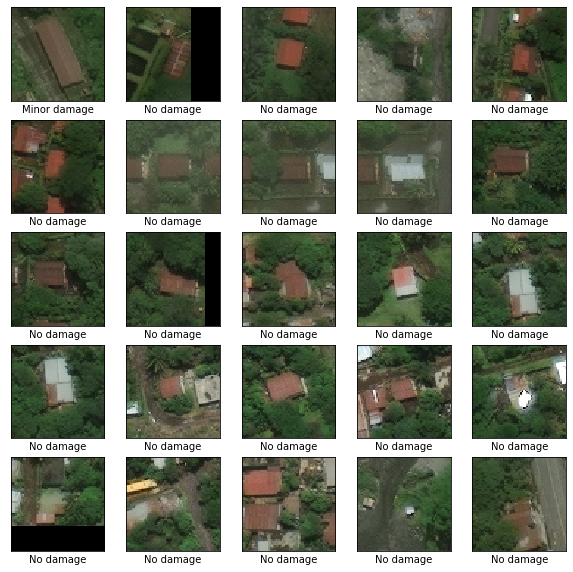

In [176]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

range(25, 50)

In [152]:
### Test Data #######################################################################
### Take a random m_testing examples and load the data

img_dict = l_f.load_file(data_file_name, list_of_rows[m_training:m_training + m_testing])
### Load and process the images
(test_x, test_y) = load_images(path_training, img_dict) #getting test example from the same training folder
print(test_x.shape)
print(test_y.shape)

(5000, 64, 64, 3)
(5000,)


In [153]:
train_y -= 1 
test_y -= 1

In [154]:
train_x = train_x / 255.0

test_x = test_x / 255.0

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(4)
])

In [183]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [184]:
model.fit(train_x, train_y, epochs=200, batch_size = 1000)

Train on 20000 samples
Epoch 1/200
20000/20000 [==============================] - 2s 94us/sample - loss: 1.2861 - accuracy: 0.7362
Epoch 2/200
20000/20000 [==============================] - 2s 76us/sample - loss: 0.8922 - accuracy: 0.7367
Epoch 3/200
20000/20000 [==============================] - 2s 77us/sample - loss: 0.8809 - accuracy: 0.7367
Epoch 4/200
20000/20000 [==============================] - 2s 76us/sample - loss: 0.8771 - accuracy: 0.7367
Epoch 5/200
20000/20000 [==============================] - 1s 75us/sample - loss: 0.8725 - accuracy: 0.7367
Epoch 6/200
20000/20000 [==============================] - 2s 75us/sample - loss: 0.8674 - accuracy: 0.7367
Epoch 7/200
20000/20000 [==============================] - 2s 76us/sample - loss: 0.8607 - accuracy: 0.7367
Epoch 8/200
20000/20000 [==============================] - 2s 76us/sample - loss: 0.8543 - accuracy: 0.7367
Epoch 9/200
20000/20000 [==============================] - 2s 77us/sample - loss: 0.8490 - accuracy: 0.7367
Epoch

20000/20000 [==============================] - 1s 73us/sample - loss: 0.6998 - accuracy: 0.7446
Epoch 150/200
20000/20000 [==============================] - 2s 90us/sample - loss: 0.7105 - accuracy: 0.7412
Epoch 151/200
20000/20000 [==============================] - 2s 106us/sample - loss: 0.7071 - accuracy: 0.7423
Epoch 152/200
20000/20000 [==============================] - 2s 96us/sample - loss: 0.6961 - accuracy: 0.7452
Epoch 153/200
20000/20000 [==============================] - 1s 70us/sample - loss: 0.6921 - accuracy: 0.7463
Epoch 154/200
20000/20000 [==============================] - 2s 76us/sample - loss: 0.7077 - accuracy: 0.7438
Epoch 155/200
20000/20000 [==============================] - 2s 100us/sample - loss: 0.7049 - accuracy: 0.7433
Epoch 156/200
20000/20000 [==============================] - 2s 117us/sample - loss: 0.6939 - accuracy: 0.7462
Epoch 157/200
20000/20000 [==============================] - 2s 111us/sample - loss: 0.7154 - accuracy: 0.7432
Epoch 158/200
20000/

In [185]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)

5000/5000 - 1s - loss: 0.8042 - accuracy: 0.7200

Test accuracy: 0.72
